# Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [91]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
subjDir = allSubjDirs[0] # this will eventually go through a loop
#print subjDir
subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
#print subjFilePath
ds = pd.read_csv(subjFilePath)
print ds.head(5)
print ds.columns

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL     ...      nf000  nf090  nf180  nf270     pd000  pd090  pd180  \
0  4.8  256     ...          0      0      0      1  0.000000      0      0   
1  2.4  256     ...          1      0      0      0  0.016667      0      0   
2  9.6  256     ...          1      0      0      0  0.016667      0      0   
3  0.3  256     ...          0      0      0      1  0.000000      0      0   
4  0.0  256     ...          0      0      0      1  0.000000      0      0   

      pd270  qnResp      ringSz  
0  0.01666

For each participant, plotting the number of left/right/up/down responses throughout the trial. Transforming the data set first.

In [92]:
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL ...      pd000  pd090  pd180     pd270  qnResp      ringSz  \
0  4.8  256 ...   0.000000      0      0  0.016667       0   25.800000   
1  2.4  256 ...   0.016667      0      0  0.000000       0   99.514286   
2  9.6  256 ...   0.016667      0      0  0.000000       0  136.371429   
3  0.3  256 ...   0.000000      0      0  0.016667       0  136.371429   
4  0.0  256 ...   0.000000      0      0  0.016667       0  136.371429   

   vDiffR  nfR  v000 v180  
0     4.2    0   4.8  0.6  
1     1.2    1   1

# Summary plots

These plots show the speed at which the directional predominance was indicated the most.

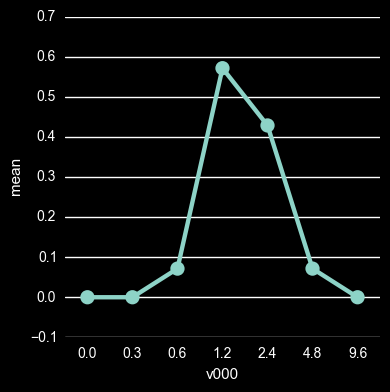

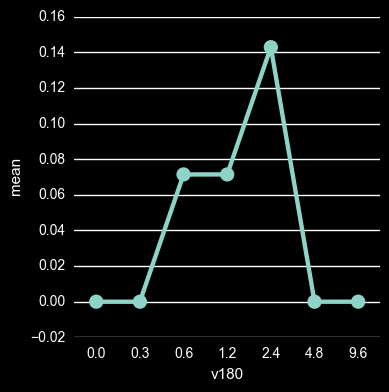

In [93]:
sumR = ds.groupby('v000', as_index=False)['nf000'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumL = ds.groupby('v180', as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumR['nf000','v000'] = sumR['v000']
sumL['nf180','v180'] = sumL['v180']
g = sns.factorplot(x='v000', y='mean', data=sumR['nf000'])
g = sns.factorplot(x='v180', y='mean', data=sumL['nf180'])

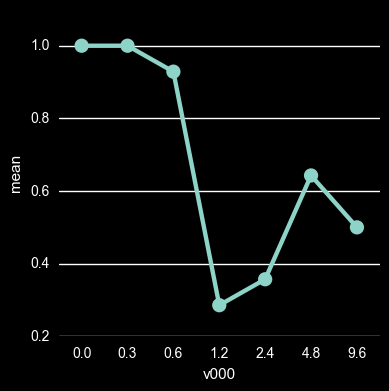

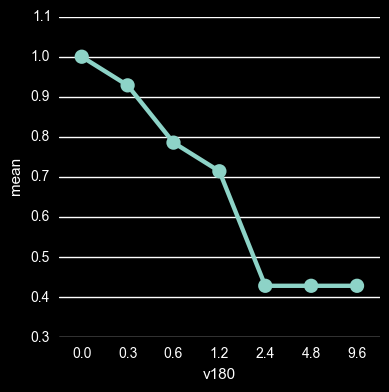

In [94]:
sumDR = ds.groupby('v000', as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDL = ds.groupby('v180', as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDR['nf270','v000'] = sumR['v000']
sumDL['nf270','v180'] = sumL['v180']
g = sns.factorplot(x='v000', y='mean', data=sumDR['nf270'])
g = sns.factorplot(x='v180', y='mean', data=sumDL['nf270'])

   v000 v180 nf270                              
               sum mean       std size v000 v180
0   0.0  4.8     2  1.0  0.000000    2  0.0  4.8
1   0.0  9.6     2  1.0  0.000000    2  0.0  9.6
2   0.3  4.8     2  1.0  0.000000    2  0.3  4.8
3   0.3  9.6     2  1.0  0.000000    2  0.3  9.6
4   0.6  2.4     1  0.5  0.707107    2  0.6  2.4
5   0.6  4.8     2  1.0  0.000000    2  0.6  4.8
6   0.6  9.6     2  1.0  0.000000    2  0.6  9.6
7   1.2  0.6     0  0.0       NaN    1  1.2  0.6
8   1.2  1.2     0  0.0  0.000000    2  1.2  1.2
9   1.2  2.4     0  0.0  0.000000    2  1.2  2.4
10  1.2  4.8     0  0.0  0.000000    2  1.2  4.8
11  1.2  9.6     0  0.0  0.000000    2  1.2  9.6
12  2.4  0.0     1  1.0       NaN    1  2.4  0.0
13  2.4  0.3     1  0.5  0.707107    2  2.4  0.3
14  2.4  0.6     1  1.0       NaN    1  2.4  0.6
15  2.4  1.2     0  0.0       NaN    1  2.4  1.2
16  2.4  2.4     0  0.0       NaN    1  2.4  2.4
17  2.4  4.8     0  0.0       NaN    1  2.4  4.8
18  2.4  9.6     0  

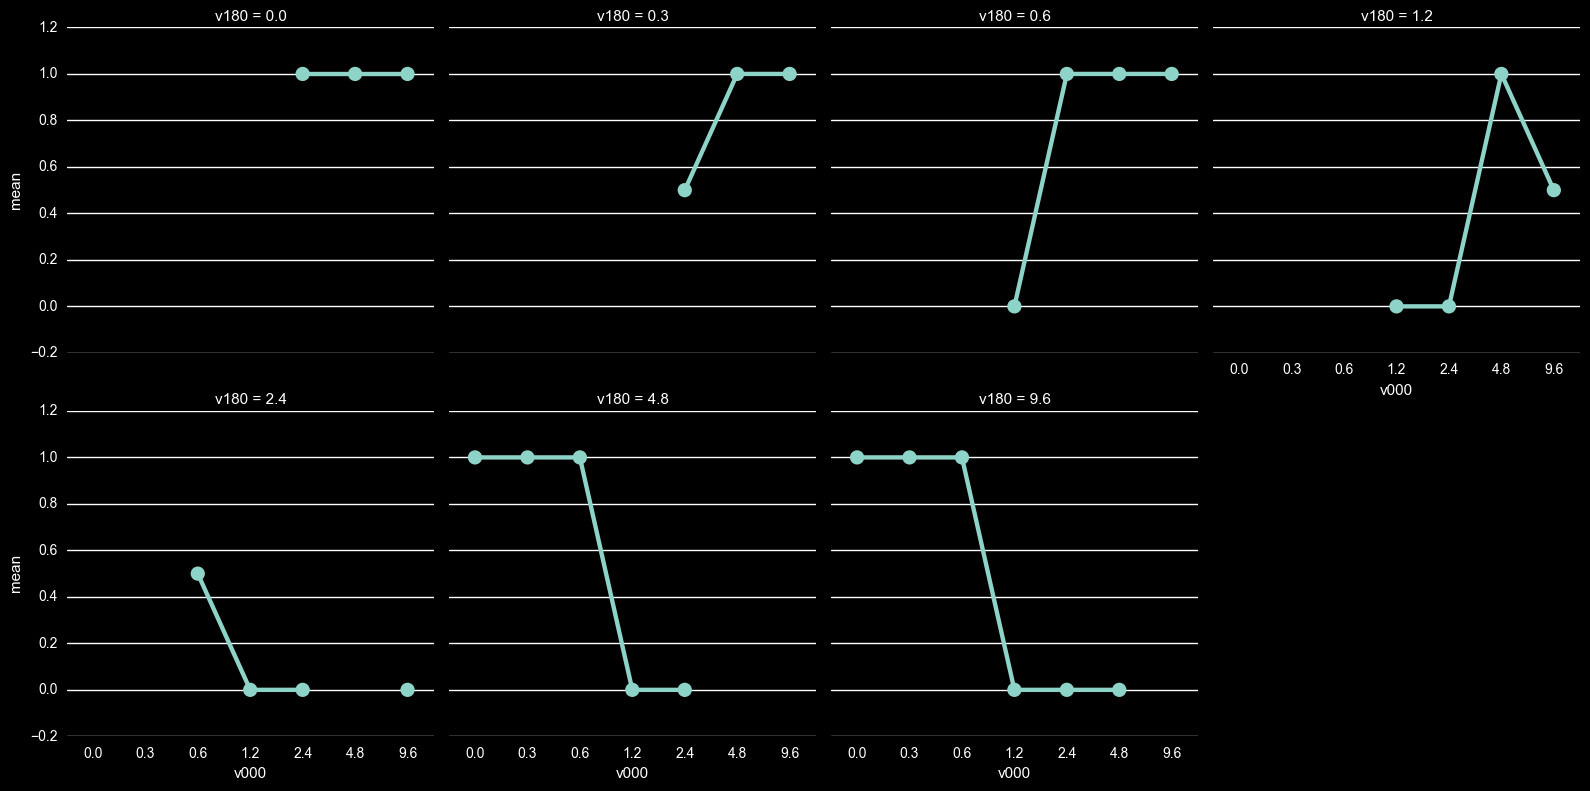

In [102]:
sumD = ss.groupby(['v000','v180'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumD['nf270','v000'] = sumD['v000']
sumD['nf270','v180'] = sumD['v180']
print sumD
g = sns.factorplot(x='v000', y='mean', col='v180', col_wrap=4, data=sumD['nf270'], hue_kws={'alpha':.01})

In [100]:
ss = ds.ix[ds['ringSz']>30,]
ss.head(5)
sumSs = ds.groupby(['v000','v180'], as_index=False)['nf270'].agg([])
sns.factorplot(x='v000', y='')

,expName,time,participant,session,trialN,dirL,dirR,vL,vR,szL,...,pd000,pd090,pd180,pd270,qnResp,ringSz,vDiffR,nfR,v000,v180
1,mcvct_bv0,2016-10-18_1556,0,1,2,0,180,1.2,2.4,256,...,0.016667,0,0,0.000000,0,99.514286,1.2,1,1.2,2.4
2,mcvct_bv0,2016-10-18_1556,0,1,3,0,180,4.8,9.6,256,...,0.016667,0,0,0.000000,0,136.371429,4.8,1,4.8,9.6
3,mcvct_bv0,2016-10-18_1556,0,1,4,0,180,4.8,0.3,256,...,0.000000,0,0,0.016667,0,136.371429,-4.5,0,4.8,0.3
4,mcvct_bv0,2016-10-18_1556,0,1,5,0,180,2.4,0.0,256,...,0.000000,0,0,0.016667,0,136.371429,-2.4,0,2.4,0.0
6,mcvct_bv0,2016-10-18_1556,0,1,7,0,180,0.6,2.4,256,...,0.000000,0,0,0.016667,0,99.514286,1.8,0,0.6,2.4


The question here is, as the difference between the two speeds increases, what is the rightward, leftward, and no predominance?

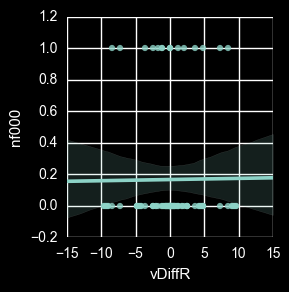

In [96]:
sns.lmplot(x='vDiffR', y='nf000', data=ds, size=3)

The next plots show the two directions separately. The question is, what is the predominance given the increase of the velocity to the right? And to the left? Left column is for central presentation, the right is peripheral.

(-0.1, 1.1)

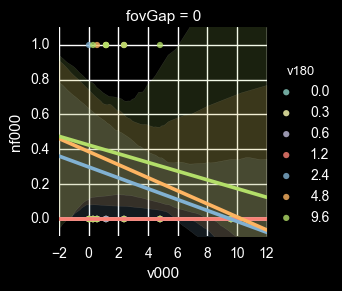

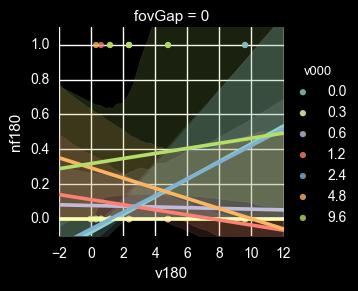

In [13]:
lm = sns.lmplot(x='v000', y='nf000', hue='v180', data=ds, size=3)
lm.axes[0,0].set_ylim(-0.1,1.1)
lm = sns.lmplot(x='v180', y='nf180', hue='v000', data=ds, size=3)
lm.axes[0,0].set_ylim(-0.1,1.1)

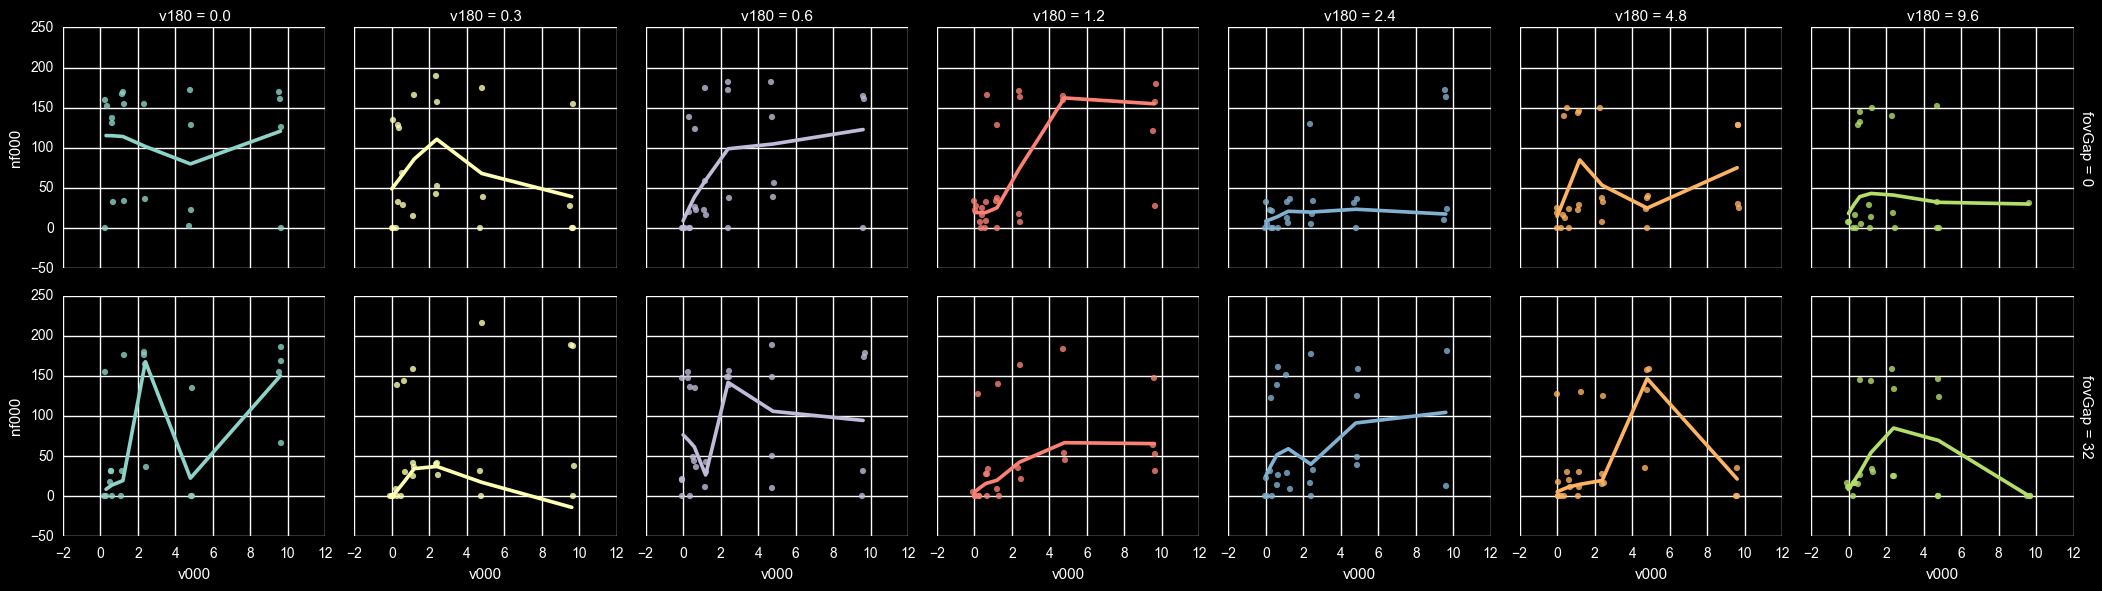

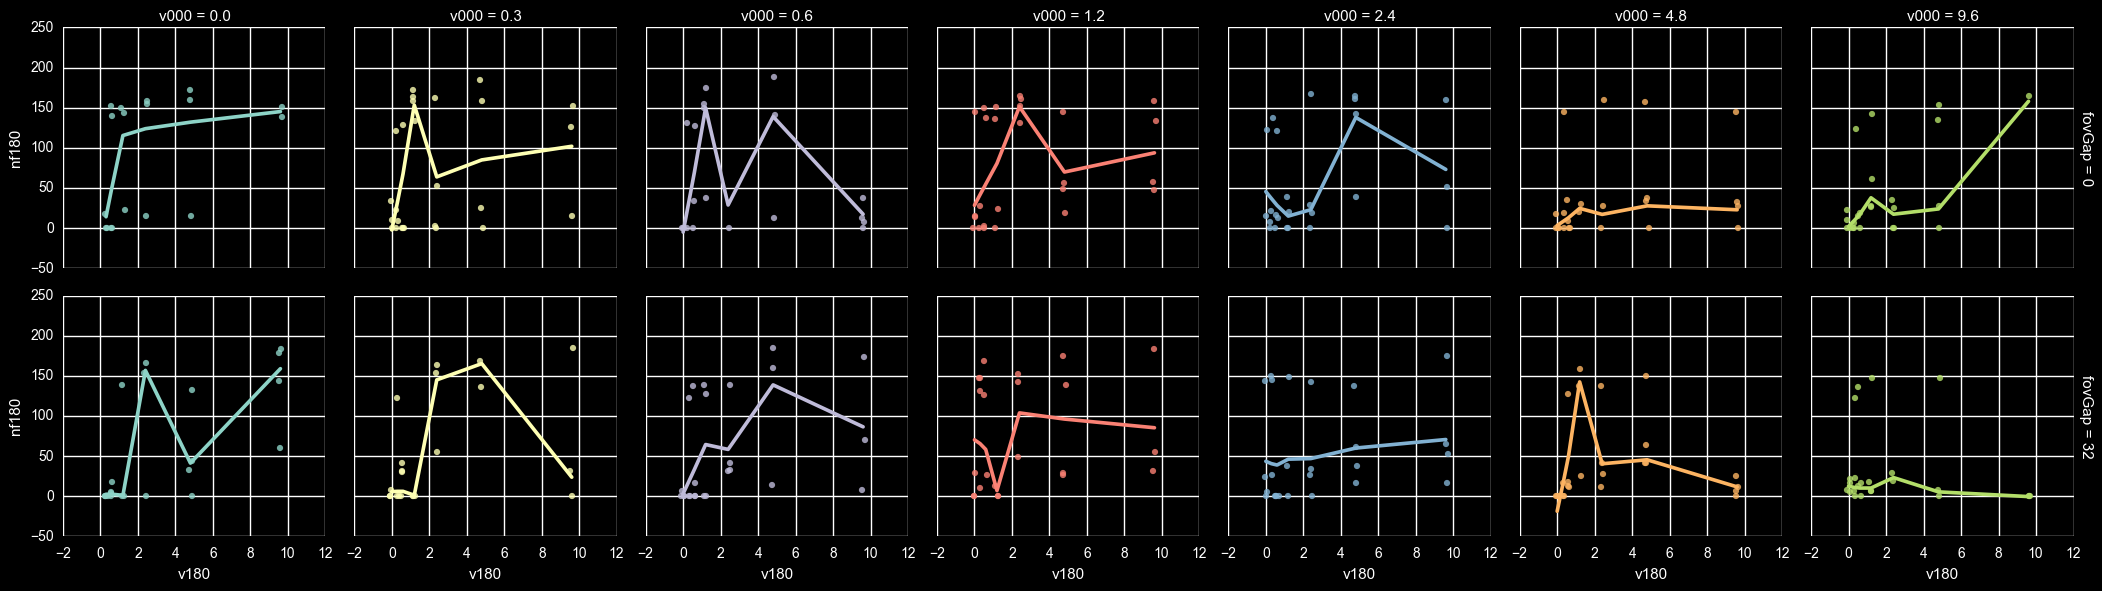

In [65]:
g = sns.FacetGrid(ds, row='fovGap', col='v180', hue='v180', margin_titles=True)
g.map(sns.regplot, "v000", "nf000", lowess=True, x_jitter=.1);
g = sns.FacetGrid(ds, row='fovGap', col='v000', hue='v000', margin_titles=True)
g.map(sns.regplot, "v180", "nf180", lowess=True, x_jitter=.1);